train score: 0.970800964371819
test score: 0.9505165851005981


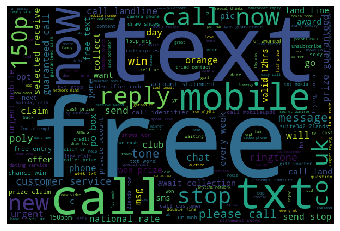

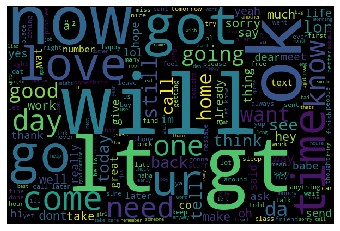

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, æ¯1.50 to rcv
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Thanks for your subscription to Ringtone UK your mobile will be charged æ¯5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per ms

In [1]:
#摘自簡報說明：
#題目: 將Kaggle Dataset SMS文件以機器學習方式分辨是否為垃圾郵件
#說明：輸入文件spam.csv是一個至少有兩欄v1和v2的csv檔，v1註明該簡訊是ham還是spam，v2是sms內容本身，
#我們在讀入後先去掉不必要的欄位內容，將欄位名稱改為labels和data，再將labels內容改成0/1，0
#代表ham1代表spam。接著將內容切割成訓練集和測試集，再用tokenizer做前處理，最後形成可以分析的格式。
#建模分析之後我們印出訓練和測試準確度，然後以word cloud畫出spam和ham常用的字，
#再分別印出判斷錯誤的SMS供未來改進。
#延伸:可用不同的tokenizer，不同的ML分類器做改進準確率的比較。
#範例程式檔名: spam_sms_垃圾簡訊偵測器.py，以Naïve Bayes (MultinomialNB) 方式完成
#模組: sklearn, pandas, numpy, wordcloud
#輸入檔：spam.csv
#成績：辨識百分率
#進一步說明：
#在這個習題中，我們從Kaggle下載SMS簡訊資料，經由前處理之後判斷是否為SPAM
#並畫出垃圾字雲來
#
#以下是本習題要做的
#
#1.前處理：
# 刪除不必要的欄位
# 重新命名欄位
# 二元數位化標記(labels)
# 分為訓練與測試組
#
#2.特徵：可選用 Count or TF-IDF
#3.建模，訓練，印出
#4.列出判斷錯的 


from __future__ import print_function, division
from future.utils import iteritems
from builtins import range


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud


# 資料來自：
# https://www.kaggle.com/uciml/sms-spam-collection-dataset

df = pd.read_csv('./datasets/spam.csv', encoding='ISO-8859-1')

# 刪除不必要的欄位
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# 重新命名欄位
df.columns = ['labels', 'data']

# 二元數位化標記(labels)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# 分為訓練與測試組
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

# 方法1:以TF-IDF 為特徵
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

# 方法2:以數量為特徵
# count_vectorizer = CountVectorizer(decode_error='ignore')
# Xtrain = count_vectorizer.fit_transform(df_train)
# Xtest = count_vectorizer.transform(df_test)



# 產生模型，訓練，印出
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()


# 以wordcloud visualize 數據
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('spam')
visualize('ham')


# 找出判斷錯誤的地方
X = tfidf.transform(df['data'])
df['predictions'] = model.predict(X)

# 沒預測出的SPAM
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

# 以為是SPAM其實誤判
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)




In [2]:
## my
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

def get_result_grid(estimator, params, model_name, Xtrain, Ytrain, Xtest, Ytest):
    print(model_name, '結果如下:')
    grid = GridSearchCV(estimator, param_grid=params)
    grid.fit(Xtrain, Ytrain)
    print(grid.best_estimator_)
    print(grid.best_params_)
    print(grid.best_score_)

    print(grid.score(Xtest, Ytest))
    return grid

In [6]:
## KNN

knn_param = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
}
grid_knn = get_result_grid(KNeighborsClassifier(), knn_param, 'KNN', Xtrain, Ytrain, Xtest, Ytest)

KNN 結果如下:
KNeighborsClassifier(n_neighbors=10, weights='distance')
{'n_neighbors': 10, 'weights': 'distance'}
0.9662499865413396
0.9613920609026645


In [7]:
## 隨機森林

rf_param = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

grid_rf = get_result_grid(RandomForestClassifier(), rf_param, '隨機森林', Xtrain, Ytrain, Xtest, Ytest)

隨機森林 結果如下:
RandomForestClassifier(min_samples_split=4)
{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}
0.9777644985662042
0.9749864056552474


In [8]:
## GDBT

gdbt_param = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

grid_gdbt = get_result_grid(GradientBoostingClassifier(), gdbt_param, '梯度提升樹', Xtrain, Ytrain, Xtest, Ytest)

梯度提升樹 結果如下:
GradientBoostingClassifier(max_depth=10, min_samples_split=4, n_estimators=150)
{'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 150}
0.9748201025729368
0.9706362153344209


## 試著透過PCA降維
- 因為PCA不支持sparse input，所以用TruncatedSVD
    - 沒有中心化的步驟，跟PCA對比。
- 其實也可以融入pipeline 去找尋最佳參數

In [3]:
Xtrain.shape

(3733, 6913)

In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2000, n_iter=5, random_state=42)
x_train_reduced = svd.fit_transform(Xtrain)
x_test_reduced = svd.transform(Xtest)

In [11]:
## KNN reduced
## 發現效果更好了一些!超參數也獲得一些調整，可能是因為雜訊更少了

knn_param = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance'],
}
grid_knn_reduced = get_result_grid(KNeighborsClassifier(), knn_param, 'KNN', x_train_reduced, Ytrain, x_test_reduced, Ytest)

KNN 結果如下:
KNeighborsClassifier(n_neighbors=15, weights='distance')
{'n_neighbors': 15, 'weights': 'distance'}
0.9654446203042732
0.9679173463839043


In [12]:
## 隨機森林 reduced
## 發現效果竟然差了許多!

rf_param = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

grid_rf_reduced = get_result_grid(RandomForestClassifier(), rf_param, '隨機森林', x_train_reduced, Ytrain, x_test_reduced, Ytest)

隨機森林 結果如下:
RandomForestClassifier(min_samples_split=4)
{'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}
0.9290132828005497
0.9276780859162589


In [ ]:
## GDBT reduced

gdbt_param = {
    'penalty': [100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4]
}

grid_gdbt_reduced = get_result_grid(GradientBoostingClassifier(), gdbt_param, '梯度提升樹', x_train_reduced, Ytrain, x_test_reduced, Ytest)

梯度提升樹 結果如下:
